<div style="border:2px solid #422e13; border-radius:30px;  background:#ffffff;">
    <div style="padding:10px 10px 10px 0px; margin:5px; border-radius:23px; background:#008000; text-align:center;">
        <span style="font-family:sans-serif; font-size:38px; color:#fff;">Цены на недвижимость в Мельбурне</span>
    </div>
</div>

<div style="border:2px solid blue; border-radius:1px; padding:1px">
    <img src="https://wikiway.com/upload/home/t/tema389/smileplanet.ru/public_html/upload/hl-photo/33f/melbourne_49.jpg/f1a/melbourne_49.jpg" width="100%">
</div>
<div style="padding:4px">

<h1 align="center">Содержание</h1>


    
* [1. Импорт необходимых библиотек](#1)
    
* [2. Загрузка данных](#2)
    
* [3. Получение информации о датасете](#3)     
    * [3.1. Получение основной информации о датасете](#3.1)    
    * [3.2. Анализ пропущенных значений](#3.2)    
    * [3.3. Замена пропущенных значений ](#3.3)
        
* [4. EDA(Exploratory Data Analysis)](#4)
    * [4.1. Одномерный анализ данных](#4.1)  
        * [4.1.1. Распределение категориальных переменных](#4.1.1)  
        * [4.1.2. Распределение непрерывных переменных](#4.1.2) 
    * [4.2. Двумерный анализ данных. Поиск корреляций](#4.2) 
        * [4.2.1. Матрица корреляции](#4.2.1) 
        * [4.2.2. Поиск зависимостей стоимости объекта с числовыми переменными](#4.2.2) 
        * [4.2.3. Поиск зависимостей стоимости объекта с текстовыми категориальными переменными](#4.2.3)
        * [4.2.4. Зависимость стоимости объектов от месторасположения по координатам](#4.2.4)
    * [4.3. Анализ временных рядов](#4.3)
    * [4.4. Анализ временных рядов с удалением глобального тренда](#4.4)
    
* [5. Machine Learning](#5)
    * [5.1. Обучающая и тестовая выборка ](#5.1) 
    * [5.2. Grid Search](#5.2)
    * [5.3. Randomized Search ](#5.3)
    * [5.4. Кросс-валидация ](#5.4)
    * [5.5. Обучение модели на всех данных ](#5.5)
    * [5.6. Feature importance ](#5.6)
    * [5.7. Сохранение модели ](#5.7)
    * [5.8. Предсказание цены на новых данных ](#5.8)
* [6.0. Выводы ](#6)

# 

<a id="1"></a>

# <b>1 <span style='color:#422e13;font-family:cursive;'>|</span> Импорт необходимых библиотек</b>

In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor
from catboost import cv,Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

from joblib import dump, load

import warnings
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm

# 

<a id="2"></a>

# <b>2 <span style='color:#422e13;font-family:cursive;'>|</span> Загрузка данных</b>

In [2]:
train_full = pd.read_csv('train.csv')

In [3]:
train_full.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


# 

<a id="3"></a>

# <b>3 <span style='color:#422e13;font-family:cursive;'>|</span> Получение информации о датасете</b>

<a id="3.1"></a>

### <b>3.1 <span style='color:#422e13;font-family:cursive;'>|</span> Получение основной информации о датасете</b>

In [4]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18373 non-null  object 
 1   Address        18373 non-null  object 
 2   Rooms          18373 non-null  int64  
 3   Type           18373 non-null  object 
 4   Price          18373 non-null  float64
 5   Method         18373 non-null  object 
 6   SellerG        18373 non-null  object 
 7   Date           18373 non-null  object 
 8   Distance       18373 non-null  float64
 9   Postcode       18373 non-null  float64
 10  Bedroom2       14905 non-null  float64
 11  Bathroom       14903 non-null  float64
 12  Car            14798 non-null  float64
 13  Landsize       13579 non-null  float64
 14  BuildingArea   7750 non-null   float64
 15  YearBuilt      8944 non-null   float64
 16  CouncilArea    18372 non-null  object 
 17  Lattitude      15041 non-null  float64
 18  Longti

In [5]:
train_full.describe().T.style.background_gradient(cmap = "summer")

,count,mean,std,min,25%,50%,75%,max
Rooms,18373.000000,2.936592,0.955952,1.000000,2.000000,3.000000,3.000000,12.000000
Price,18373.000000,1053234.882218,621797.251963,227000.000000,635000.000000,880000.000000,1301000.000000,5580000.000000
Distance,18373.000000,10.403962,6.018424,0.000000,6.300000,9.700000,13.300000,48.100000
Postcode,18373.000000,3107.258314,95.285542,3000.000000,3046.000000,3085.000000,3149.000000,3978.000000
Bedroom2,14905.000000,2.914928,0.962743,0.000000,2.000000,3.000000,3.000000,20.000000
Bathroom,14903.000000,1.538683,0.688374,0.000000,1.000000,1.000000,2.000000,8.000000
Car,14798.000000,1.617313,0.957072,0.000000,1.000000,2.000000,2.000000,10.000000
Landsize,13579.000000,558.937403,3991.516323,0.000000,177.000000,440.000000,651.000000,433014.000000
BuildingArea,7750.000000,151.133167,519.517626,0.000000,93.000000,126.000000,173.862500,44515.000000
YearBuilt,8944.000000,1965.925089,36.958956,1196.000000,1950.000000,1970.000000,2000.000000,2018.000000


# 

<a id="3.2"></a>

### <b>3.2 <span style='color:#422e13;font-family:cursive;'>|</span> Анализ пропущенных значений</b>

In [6]:
train_full.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          3468
Bathroom          3470
Car               3575
Landsize          4794
BuildingArea     10623
YearBuilt         9429
CouncilArea          1
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
id                   0
dtype: int64

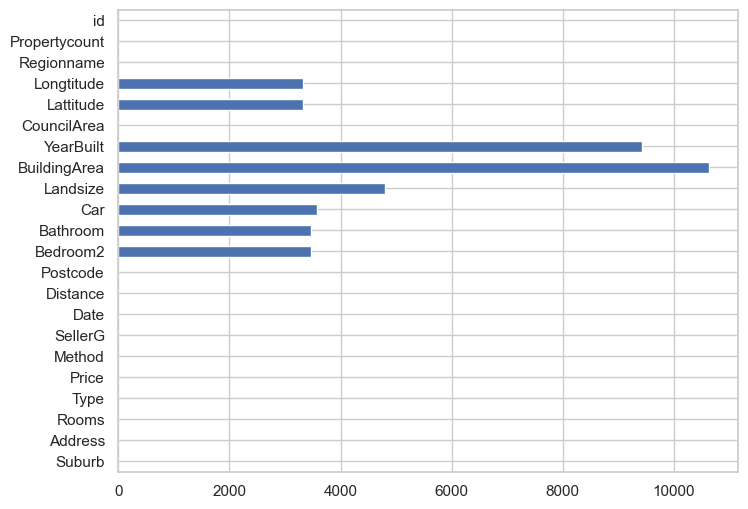

In [7]:
sns.set("notebook")
sns.set(style="whitegrid")
train_full.isna().sum().plot(kind='barh',figsize=(8,6));

- Наибольшее количество пропущенных значений в столбце с площадью объектов. 
- Также пропущенные значения в столбцах с ванными и спальными комнатами, парковочными местами, площадью прилегающей территории, год постройки, ширины и долготы.
- В столбцах с шириной, долготой, площаю объект и прилегающей тероритории пропущенные значения заменим на медиану. 
- В остальных столбцах заменим на моду.

# 

<a id="3.3"></a>

### <b>3.3 <span style='color:#422e13;font-family:cursive;'>|</span> Замена пропущенных значений</b>

In [8]:
train_full.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'id'],
      dtype='object')

In [9]:
def replace_nan(df,column):
    if column in ['Longtitude','Landsize','Lattitude','BuildingArea','Car','Distance']:
        df[column]=df[column].fillna(df[column].median())
    if column in ['Postcode']:
        df[column]=df[column].fillna(0)
    if column in ['YearBuilt','Car','Bathroom','Bedroom2','CouncilArea','Regionname','Propertycount']:
        df[column]=df[column].fillna(df[column].mode().values[0])


In [10]:
for col in train_full.columns[train_full.isnull().any()].tolist():
    replace_nan(train_full,col)

In [11]:
train_full.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
id               0
dtype: int64

# 

<a id="4"></a>

# <b>4 <span style='color:#422e13;font-family:cursive;'>|</span> EDA(Exploratory Data Analysis)</b>

<a id="4.1"></a>

## <b>4.1 <span style='color:#422e13;font-family:cursive;'>|</span> Одномерный анализ данных</b>

<a id="4.1.1"></a>

### <b>4.1.1 <span style='color:#422e13;font-family:cursive;'>|</span> Распределение категориальных переменных</b>

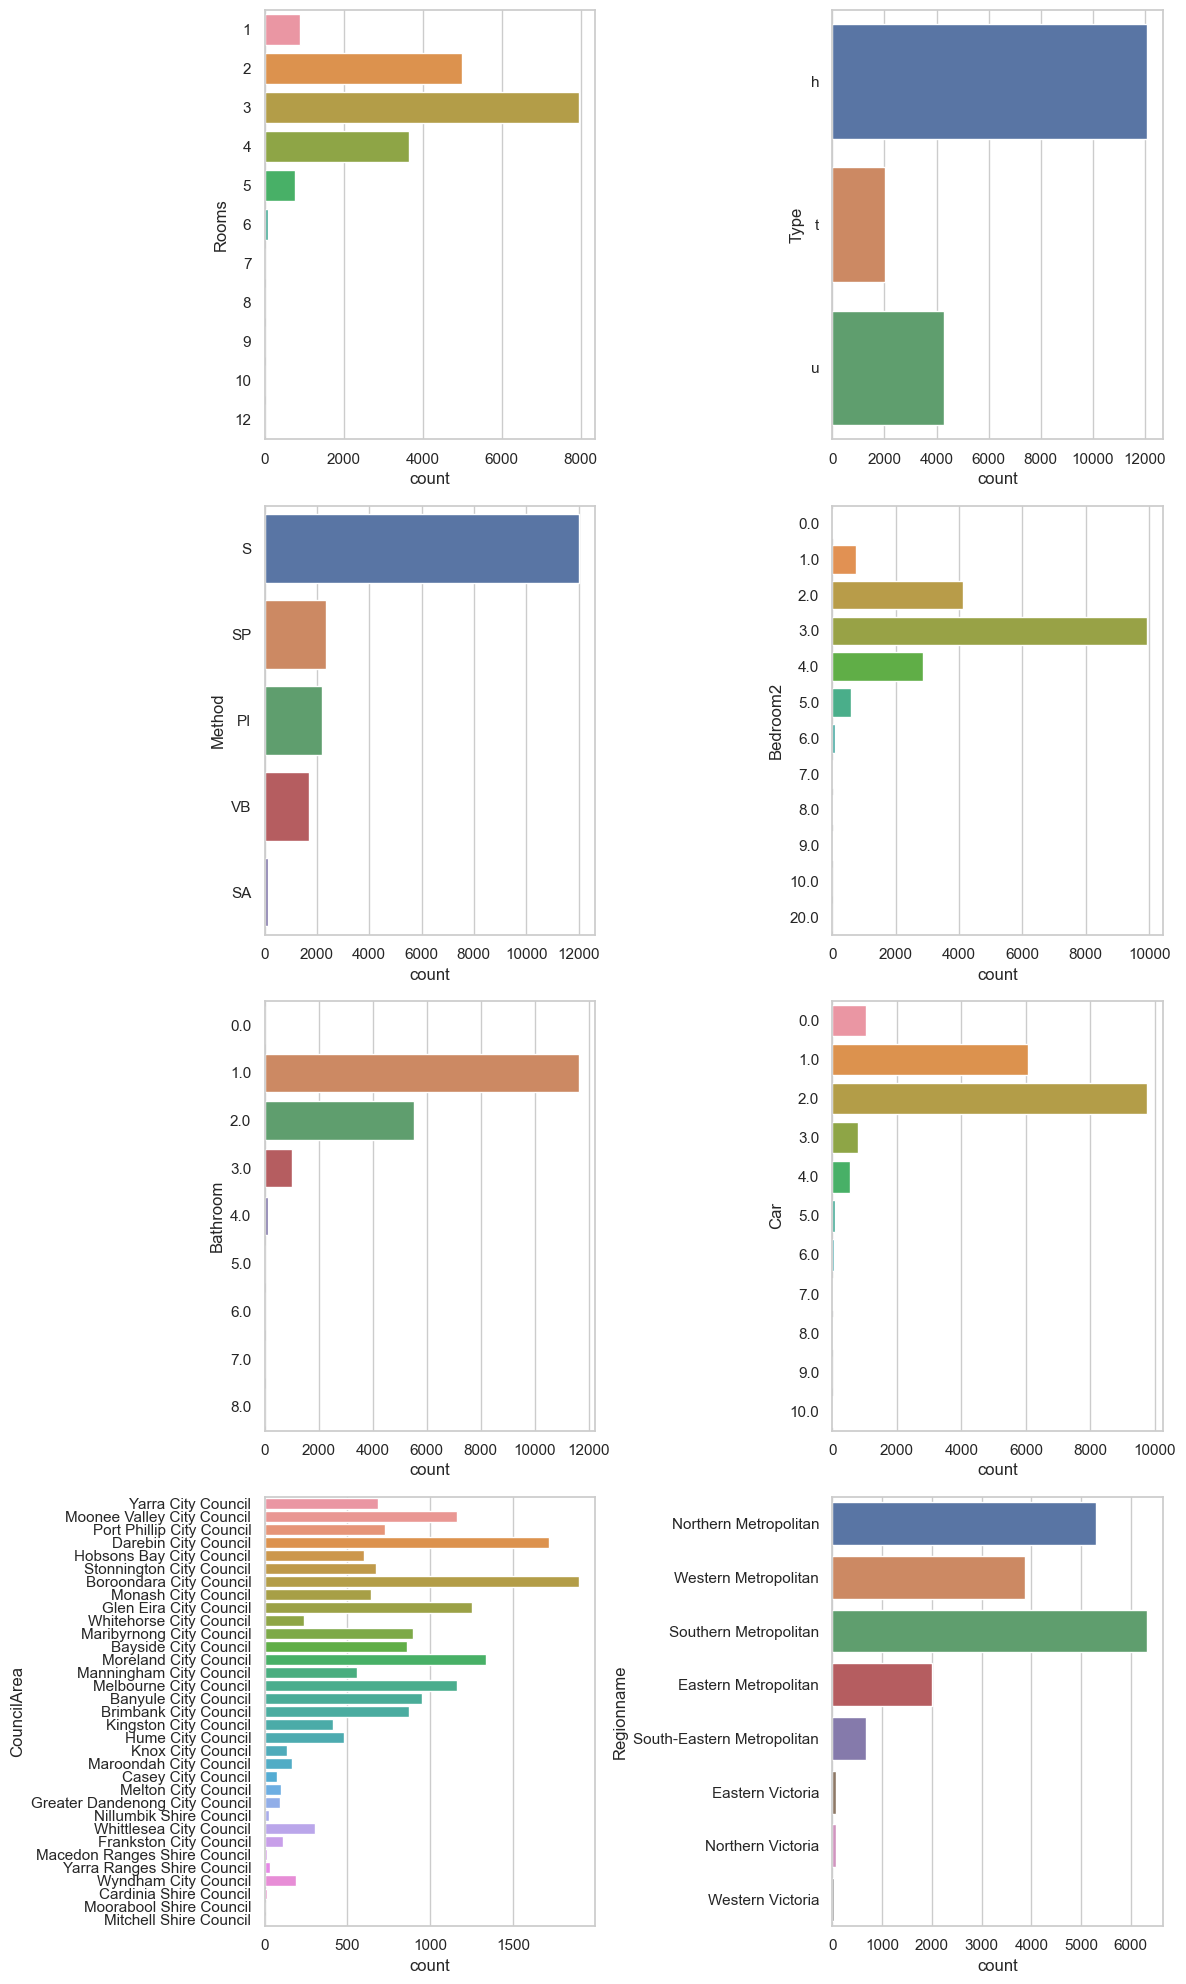

In [12]:
fig,ax=plt.subplots(4,2,figsize=(12,20))
train_=['Rooms','Type','Method','Bedroom2','Bathroom','Car','CouncilArea','Regionname']
counter=0
for i in range(4):
    for j in range(2):
        sns.countplot(data=train_full,y=train_[counter],ax=ax[i,j])
        counter+=1
plt.tight_layout()

Остановимся на типах объектов подробнее. В соответствии со Строительным кодексом Австралии существует 10 различных классов зданий, но определение жилья меняется от штата к штату и от совета к совету.

1. H - house,cottage,villa,semi,terrace.

House - отдельно стоящие дома представляют собой автономные жилища, покупатели владеют землей и любыми постройками в пределах ее границ.

Это самый распространенный тип жилья в Мельбруне, особенно в районах, удаленных от центра. Чем дальше от центра города, тем больше участки. Типичный размер участка — 4 сотки.

Они популярны среди семей с маленькими детьми, потому что у них обычно больше жилья и места в саду для игр. Но они, как правило, являются самым дорогим типом жилья, и связанные с ними земельные ставки, страховка, коммунальные услуги и счета за обслуживание могут быть высокими.

Сottage - простой, чаще всего одноэтажный или двухэтажный домик, имеющий небольшую площадь. Состоит обычно из двух или трёх комнат. Для такого типа недвижимости обязательно наличие приусадебного земельного участка, площадь которого может достигать 100 кв.м.

Villa часто считается самостоятельным типом жилья, определяемым как небольшой одноуровневый дом, обычно с пристроенным гаражом и частным двором в небольшом жилом комплексе. И еще одна особенность: это тип жилья, в котором чаще всего живут пенсионеры. Обычно их строят комплексами, в которых есть эти небольшие домики, а так же разные удобства: общий зал для проведения всяких мероприятий, иногда столовая, иногда домик медсестры, иногда бассейн и спортивный зал.

Semi-detached house – это два дома с общей звукоизолированной стеной, имеющие одинаковую планировку. Раньше такой тип дома был "бедным кузином отдельно стоящего дома", но сегодня является более доступным вариантом жилья с небольшое территорией и задним двором, который может использоваться как парковка.

Terrace - особенный вид застройки, при котором однотипные дома размещаются в один ряд. Террасы высотой от одного до четырех этажей, часто с двумя-четырьмя спальнями, передним и задним садами или внутренними дворами. Чаще все такие дома имеют общие стены, но иногда могут быть и отдельно стоящими.

Террасы, обычно встречающиеся в центральной части города, получили распространение в конце 1800-х и начале 1900-х годов, прежде чем в середине 1900-х потеряли популярность.

2. U - unit, duplex.

Unit – квартира в многоэтажном доме. Это самый популярный вид жилья в центре города. В центре земля дорогая, и поэтому чтобы люди имели возможность там жить, строят высотные дома. Чаще всего, дом будет довольно современным, недавно построенным.

Duplex современный эквивалент домов типа "semi", определяется как два жилища под одной крышей с одной общей стеной. Может быть как одноэтажным рядом друг с другом, так двухэтажным - на верхнем и нижнем уровне или полностью обособленными.

3. T - townhouse.

Townhouse это автономная собственность, иногда пристроенная, а иногда отдельно стоящая, в комплексе из трех или более жилых домов. Покупатель владеет жильем, но разделяет право собственности на землю и общее имущество с другими собственниками в комплексе. У них обычно есть внутренний двор, гараж или навес для парковки.

Этот вид жилья более популярен в районах, которые примыкают к центру города, но не в самом центре. Чем ближе к центру, тем дороже земля и участки земли становятся все меньше и меньше.

- В основном имеются 3-х комнатные квартиры. Также достаточно 2-х и 3-х комнатных. Остальных меньше.
- Большая часть объектов - house,cottage,villa, semi,terrace.
- Основной метод продажи - property sold.
- В основном количество спален - 3 шт, ванных комнат - 1, парковочных мест - 1 и 2.
- Округ с наибольшим количеством объектов - Boroondara City Council.
- Регион с наибольшим количеством объектов - Southern Metropolitan



# 

<a id="4.1.2"></a>

### <b>4.1.2 <span style='color:#422e13;font-family:cursive;'>|</span> Распределение непрерывных переменных</b>

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

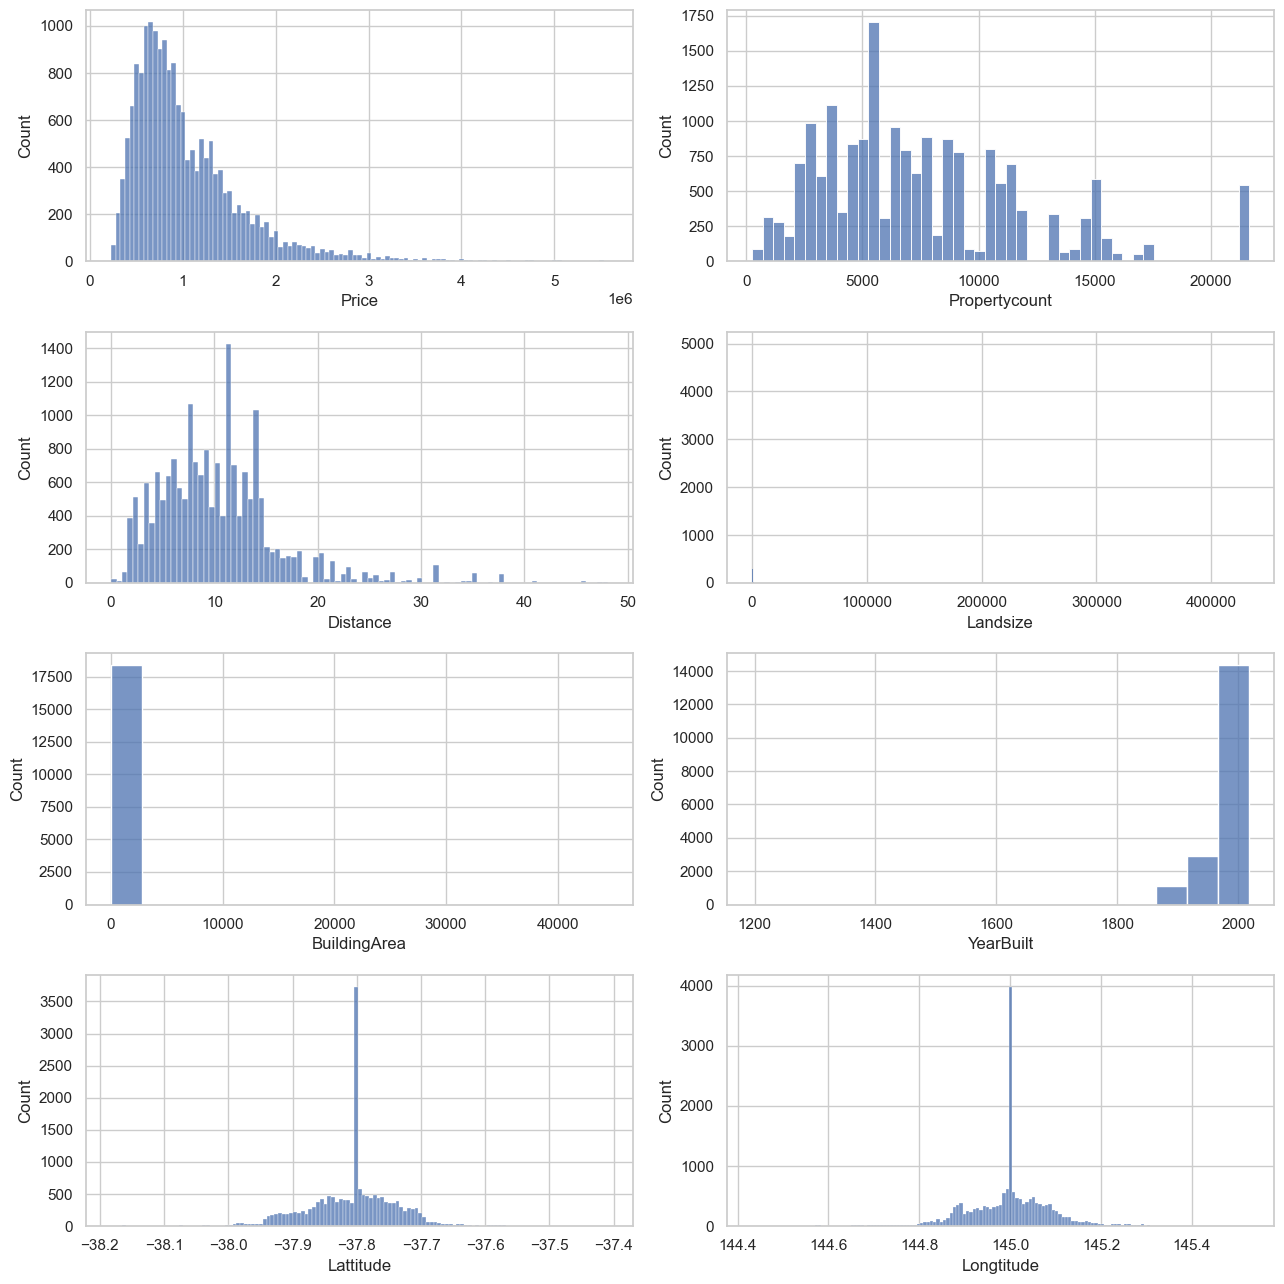

In [13]:
fig,ax=plt.subplots(4,2,figsize=(13,13))
train_=['Price','Propertycount','Distance','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']
counter=0
for i in tqdm(range(4)):
    for j in tqdm(range(2)):
        sns.histplot(data=train_full,x=train_[counter],ax=ax[i,j])
        counter+=1
plt.tight_layout()
pd.options.display.float_format = '{:.2f}'.format



- В столбцах с шириной и долготой видно что есть значения, которые попадаются намного чаще остальных.
- Год постройки имеет большой диапазон. Есть объекты, которые построены очень давно, к примеру в 1196 году.
- Цена на графике изображается в миллионах. 
- В основном объекты стоят от 500000 до 1000000.
- Некоторые столбцы необходимот иначе визуалтизировать, т.к. на графике не видно полноценное распределение.

# 

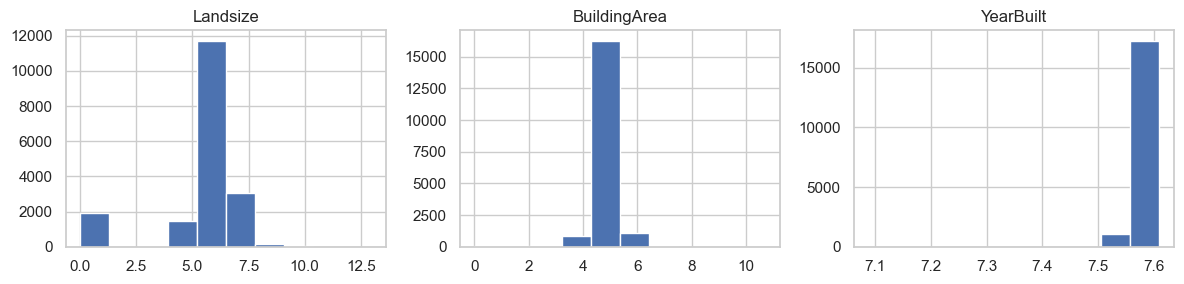

In [14]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
np.log(train_full['Landsize']+1).hist(ax=ax[0])
ax[0].set_title('Landsize')
np.log(train_full['BuildingArea']+1).hist(ax=ax[1])
ax[1].set_title('BuildingArea')
np.log(train_full['YearBuilt']+1).hist(ax=ax[2])
ax[2].set_title('YearBuilt')
plt.tight_layout()
plt.show()


In [15]:
np.exp(6),np.exp(5),np.exp(7.6)

(403.4287934927351, 148.4131591025766, 1998.1958951041172)

- Площадь прилегающей теорритории в основном около 400 м2. 
- Площадь объектов в основном около 150 м2. 
- Год постройки большинства объектов около 2000 года.

 <a id="4.2"></a>

## <b>4.2 <span style='color:#422e13;font-family:cursive;'>|</span> Двумерный анализ данных. Поиск корреляций</b>

 <a id="4.2.1"></a>

### <b>4.2.1 <span style='color:#422e13;font-family:cursive;'>|</span> Матрица корреляции</b>

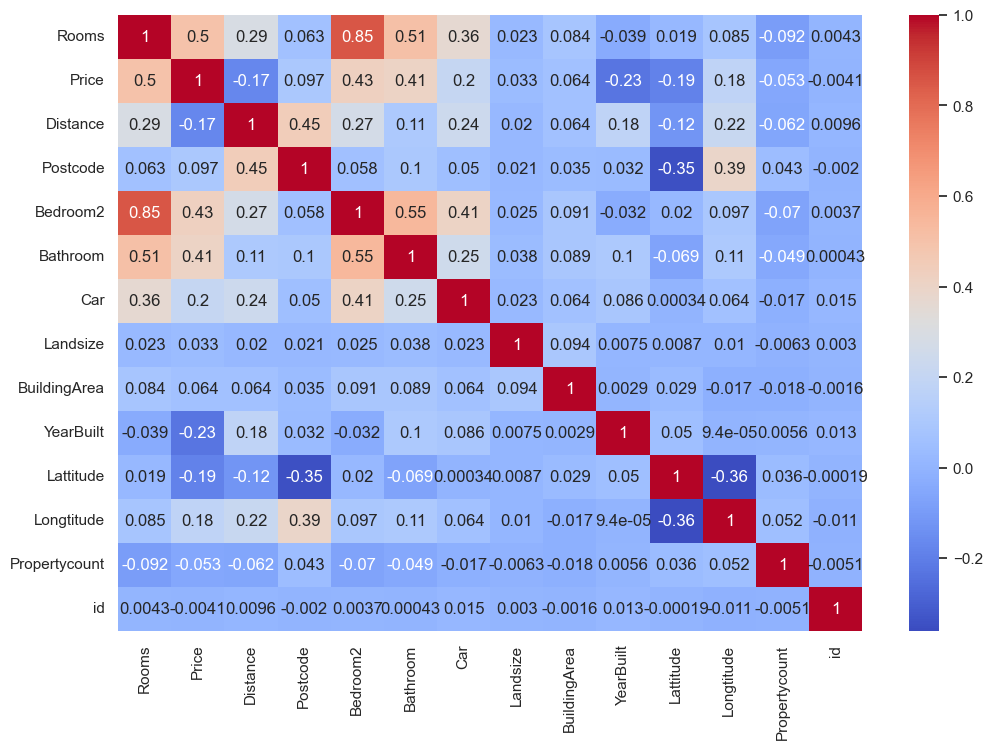

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(train_full.corr(),annot=True,cmap='coolwarm');

- Цена больше зависит от количества комнат, спальных комнат, ванных комнат.
- С остальными признаками меньшая зависимость.

# 

 <a id="4.2.2"></a>

### <b>4.2.2 <span style='color:#422e13;font-family:cursive;'>|</span> Поиск зависимостей стоимости объекта с числовыми переменными</b>

In [17]:
train_full.corr()['Price'].sort_values(ascending=False)

Price            1.00
Rooms            0.50
Bedroom2         0.43
Bathroom         0.41
Car              0.20
Longtitude       0.18
Postcode         0.10
BuildingArea     0.06
Landsize         0.03
id              -0.00
Propertycount   -0.05
Distance        -0.17
Lattitude       -0.19
YearBuilt       -0.23
Name: Price, dtype: float64

# 

Отоборазим на графиках корреляцию числовых переменных с ценой 

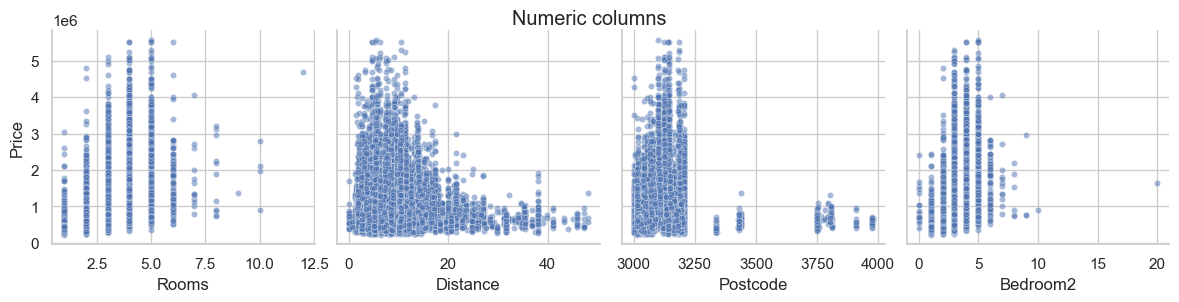

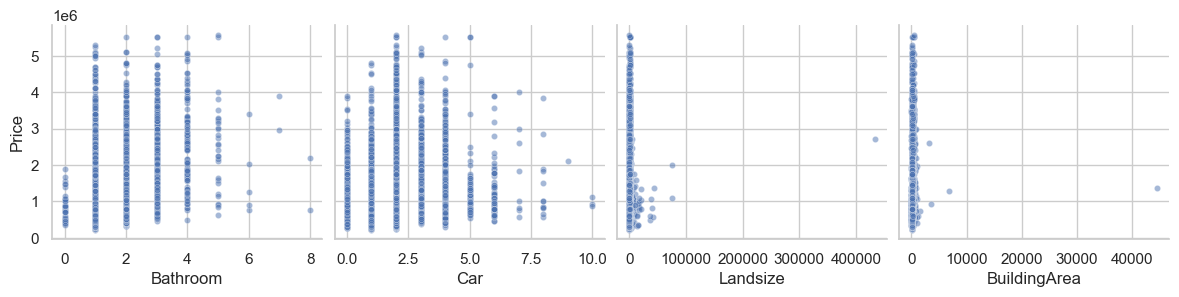

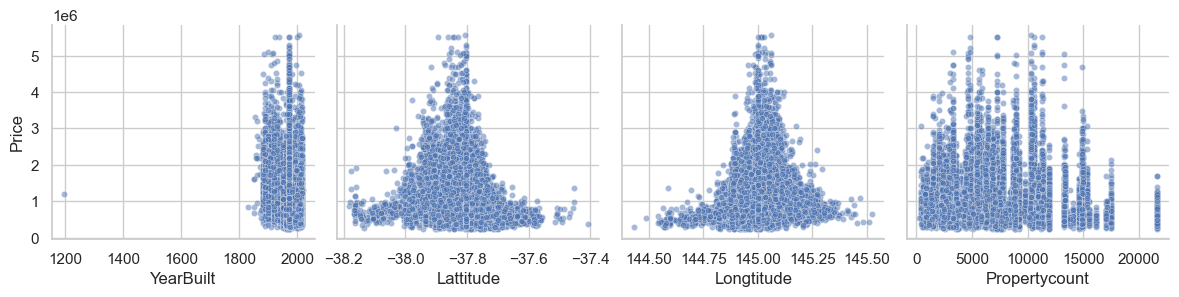

In [18]:
numeric_columns = train_full.select_dtypes(include='number')
columns = numeric_columns.columns.to_list()
columns.remove('Price')
columns.remove('id')
columns_by_row = [columns[:len(columns)//3], 
                  columns[len(columns)//3:2*len(columns)//3], 
                  columns[2*len(columns)//3:]]
g = sns.pairplot(data=train_full, 
                 x_vars=columns_by_row[0], 
                 y_vars=['Price'],
                 plot_kws=dict(s=20, alpha=0.5),
                 height=3)
g.fig.suptitle('Numeric columns')
g = sns.pairplot(data=train_full, 
                 x_vars=columns_by_row[1], 
                 y_vars=['Price'],
                 plot_kws=dict(s=20, alpha=0.5),
                 height=3)

g = sns.pairplot(data=train_full, 
                 x_vars=columns_by_row[2], 
                 y_vars=['Price'],
                 plot_kws=dict(s=20, alpha=0.5),
                 height=3)

- Видно корреляция, наиболее дорогие объекты расположены в 145 долготе.
- На графиках замечена некоторая зависимость цены объекта от количества комнат, ванных комнат, спальных комнат.

# 

Отобразим регрессию с наиболее коррелирующими признаками

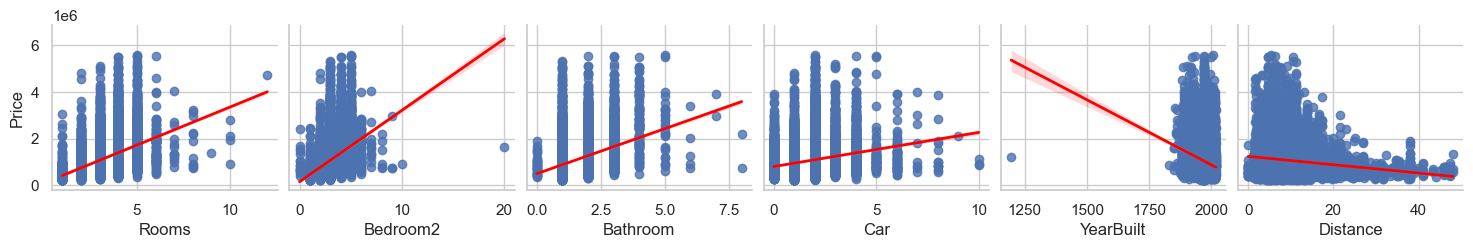

In [19]:
sns.pairplot(data=train_full, 
             x_vars=['Rooms', 'Bedroom2', 'Bathroom','Car','YearBuilt','Distance'], 
             y_vars=['Price'], kind='reg',
             plot_kws={'line_kws': {'color': 'red', 'linewidth': 2}})
plt.show()

- На графиках регрессии видна наибольшая корреляция с количеством спальных комнат. 
- Также видна зависимость с количеством комнат, ванных комнат.
- С количеством парковочных мест небольшая корреляция.
- Наиболее старые объекты стоят дороже.
- С дистанцией от центрального района в километрах замечаены зависимость, что чем объекты ближе к центральному району, те больше цена.

# 

Группировка данных по дальности расположения от центрального района

In [20]:
price_group = train_full \
                        .groupby(pd.cut(train_full['Price'],10)) \
                        ['Distance'] \
                        .agg(['count','mean'])

In [21]:
price_group = price_group \
                        .rename( \
                        columns={'count':'Количество объектов', 'mean': 'Среднее расстояние от центрального района'})

In [22]:
price_group

,Количество объектов,Среднее расстояние от центрального района
Price,,
"(221647.0, 762300.0]",7119,11.48
"(762300.0, 1297600.0]",6516,10.44
"(1297600.0, 1832900.0]",2964,9.06
"(1832900.0, 2368200.0]",1006,8.39
"(2368200.0, 2903500.0]",429,8.28
"(2903500.0, 3438800.0]",177,8.02
"(3438800.0, 3974100.0]",82,7.04
"(3974100.0, 4509400.0]",42,6.76
"(4509400.0, 5044700.0]",22,6.29


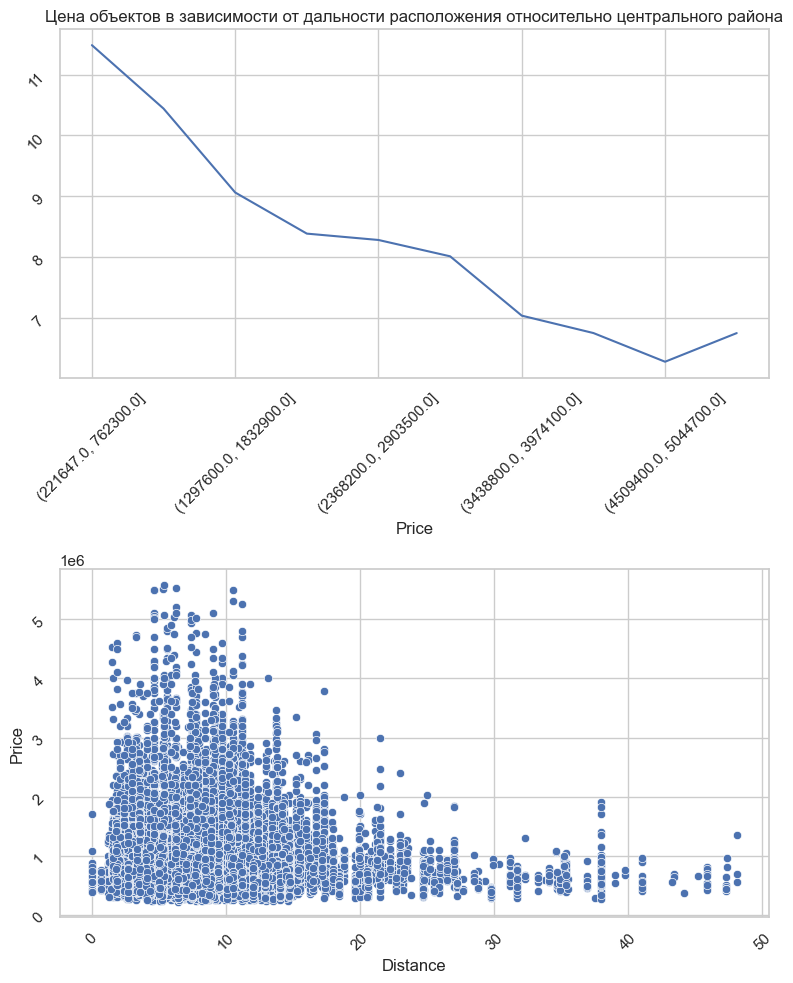

In [23]:
fig, ax = plt.subplots(2,1,figsize=(8,10))
train_full.groupby(pd.cut(train_full['Price'],10))['Distance'].mean().plot(ax=ax[0])
ax[0].set_title('Цена объектов в зависимости от дальности расположения относительно центрального района')
ax[0].tick_params(rotation=45)
sns.scatterplot(y='Price', x='Distance',data=train_full)
ax[1].tick_params(rotation=45)
plt.tight_layout()
plt.show()

- Имеется зависимость того, что чем дальше находится объект от центрального района, тем меньше цена и наоборот.

# 

 <a id="4.2.3"></a>

### <b>4.2.3 <span style='color:#422e13;font-family:cursive;'>|</span> Поиск зависимостей стоимости объектов с текстовыми категориальными переменными</b>

In [24]:
train_full[train_full \
           .select_dtypes(include=['object']).columns]


,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan
...,...,...,...,...,...,...,...,...
18368,Noble Park,5 Blaby St,h,PI,C21,30/09/2017,Greater Dandenong City Council,South-Eastern Metropolitan
18369,Reservoir,18 Elinda Pl,u,SP,RW,30/09/2017,Darebin City Council,Northern Metropolitan
18370,Roxburgh Park,14 Stainsby Cr,h,S,Raine,30/09/2017,Hume City Council,Northern Metropolitan
18371,Springvale South,30 Waddington Cr,h,S,Harcourts,30/09/2017,Greater Dandenong City Council,South-Eastern Metropolitan


In [25]:
grouped_type = train_full \
                        .groupby('Type')['Price'].agg(['count','mean'])
grouped_type = grouped_type \
                        .rename(columns={'count':'Количество объектов','mean':'Средняя цена'})

In [26]:
grouped_type

,Количество объектов,Средняя цена
Type,,
h,12091,1227437.35
t,2007,924116.83
u,4275,621154.85


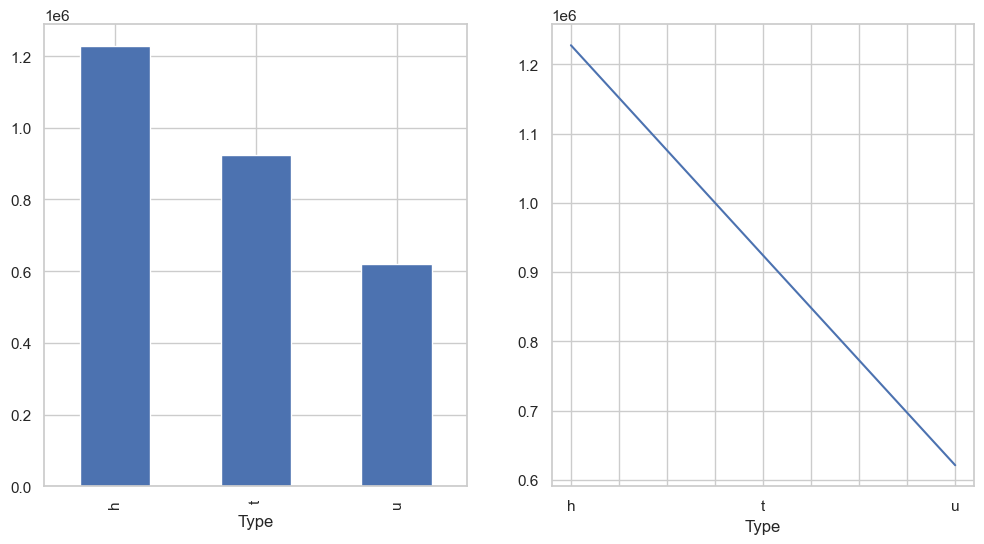

In [27]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
train_full.groupby('Type')['Price'].mean().plot(kind='bar',ax=ax[0])
train_full.groupby('Type')['Price'].mean().plot(ax=ax[1])
plt.show()

- Цена для категории объектов - h, наиболее высокая.
- Самая низкая цена для категории - u.

# 

In [28]:
grouped_method = train_full \
                            .groupby('Method')['Price'].agg(['count','mean'])
grouped_method = grouped_method \
                            .rename(columns={'count':'Количество объектов','mean':'Средняя цена'})

In [29]:
grouped_method

,Количество объектов,Средняя цена
Method,,
PI,2179,1099629.37
S,12025,1065913.84
SA,128,991058.59
SP,2353,877922.51
VB,1688,1152115.52


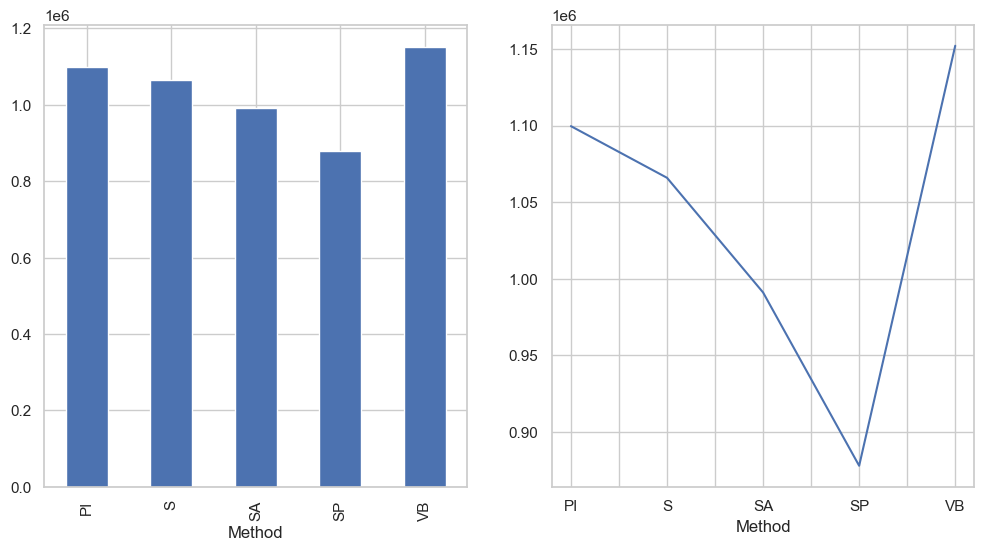

In [30]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
train_full \
            .groupby('Method')['Price'].mean() \
            .plot(kind='bar',ax=ax[0])
train_full \
            .groupby('Method')['Price'].mean() \
            .plot(ax=ax[1])
plt.show()

- Продажа наиболее дорогих объектов замечена по методу предложения поставщика.
- По методу 'недвижимость продана ранее' были проданы самые дешевые объекты.

# 

In [31]:
grouped_region = train_full \
                            .groupby('Regionname')['Price'] \
                            .agg(['count','mean'])
grouped_region = grouped_region \
                            .rename({'count':'Количество объектов', 'mean': 'Средняя цена'})
grouped_region

,count,mean
Regionname,,
Eastern Metropolitan,1999,1100020.38
Eastern Victoria,79,701632.68
Northern Metropolitan,5305,863579.30
Northern Victoria,63,603253.97
South-Eastern Metropolitan,683,877998.30
Southern Metropolitan,6327,1356354.61
Western Metropolitan,3875,846332.87
Western Victoria,42,394125.00


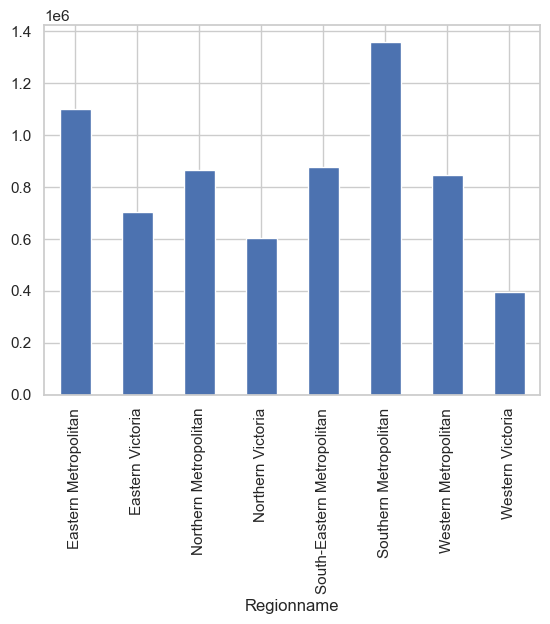

In [32]:
train_full \
            .groupby('Regionname')['Price'].mean() \
            .plot(kind='bar')
plt.show()

- В регионе Southern Metropolitan были проданы наиболее дорогие объекты.
- Самые дешевые объекты были проданы в регионе Western Victoria

# 

 <a id="4.2.4"></a>

### <b>4.2.4 <span style='color:#422e13;font-family:cursive;'>|</span> Зависимость стоимости объектов от месторасположения по координатам</b>

In [33]:
df = train_full.copy()
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longtitude, df.Lattitude))

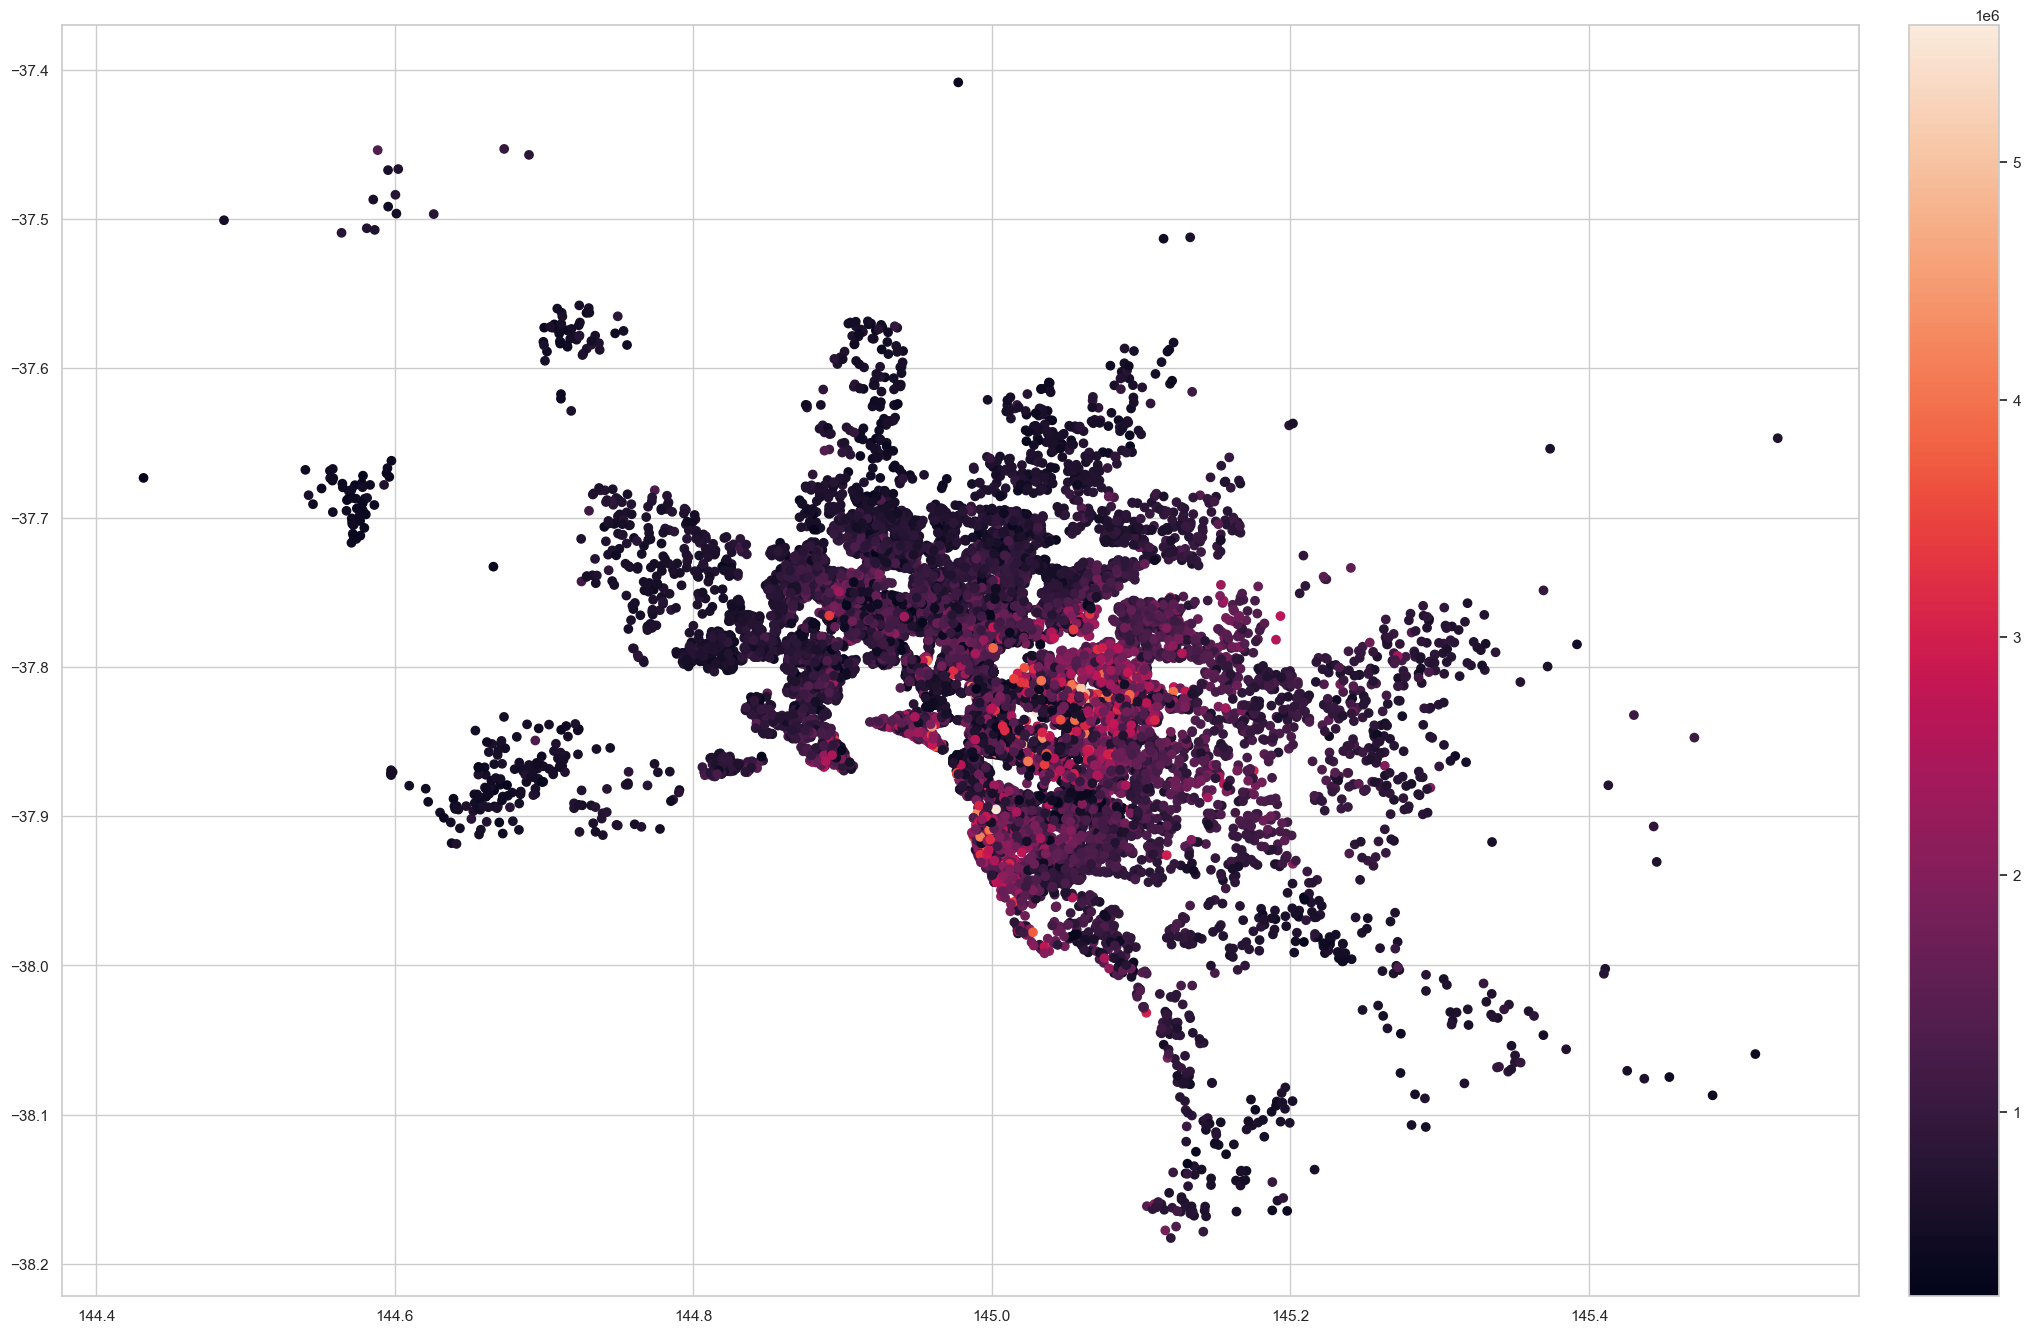

In [34]:
fig, ax = plt.subplots(1, 1,figsize=(25,25))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
gdf.plot(column='Price',ax=ax,legend=True,cax=cax)
plt.show()

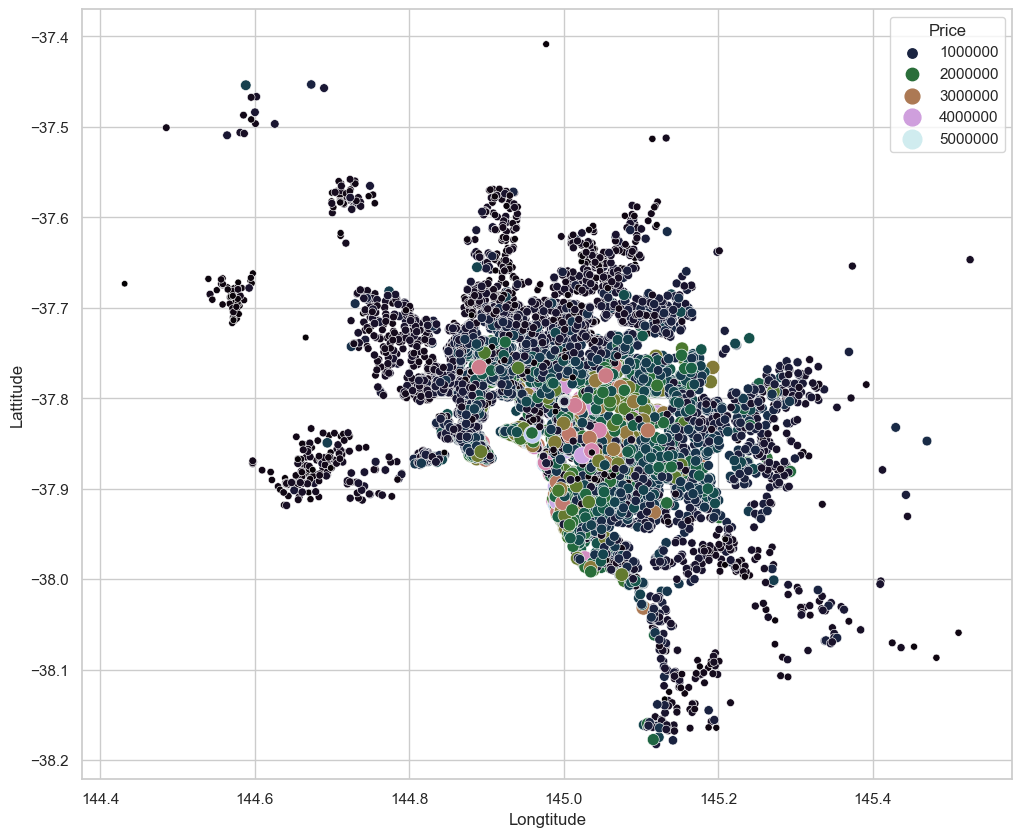

In [35]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Longtitude',
               y='Lattitude',
                hue='Price',
                size='Price',
                sizes=(20,200),
                palette='cubehelix',
               data=train_full)
plt.show()

- Чем ближе объекты распологаются к центральному району, тем выше стоимость объекта.

# 

 <a id="4.3"></a>

## <b>4.3 <span style='color:#422e13;font-family:cursive;'>|</span> Анализ временных рядов</b>

In [36]:
df_time=train_full.copy()
df_time['year']=pd.to_datetime(df_time['Date']).dt.year
df_time['month']=pd.to_datetime(df_time['Date']).dt.month
df_time['day']=pd.to_datetime(df_time['Date']).dt.day
df_time['weekday']=pd.to_datetime(df_time['Date']).dt.weekday


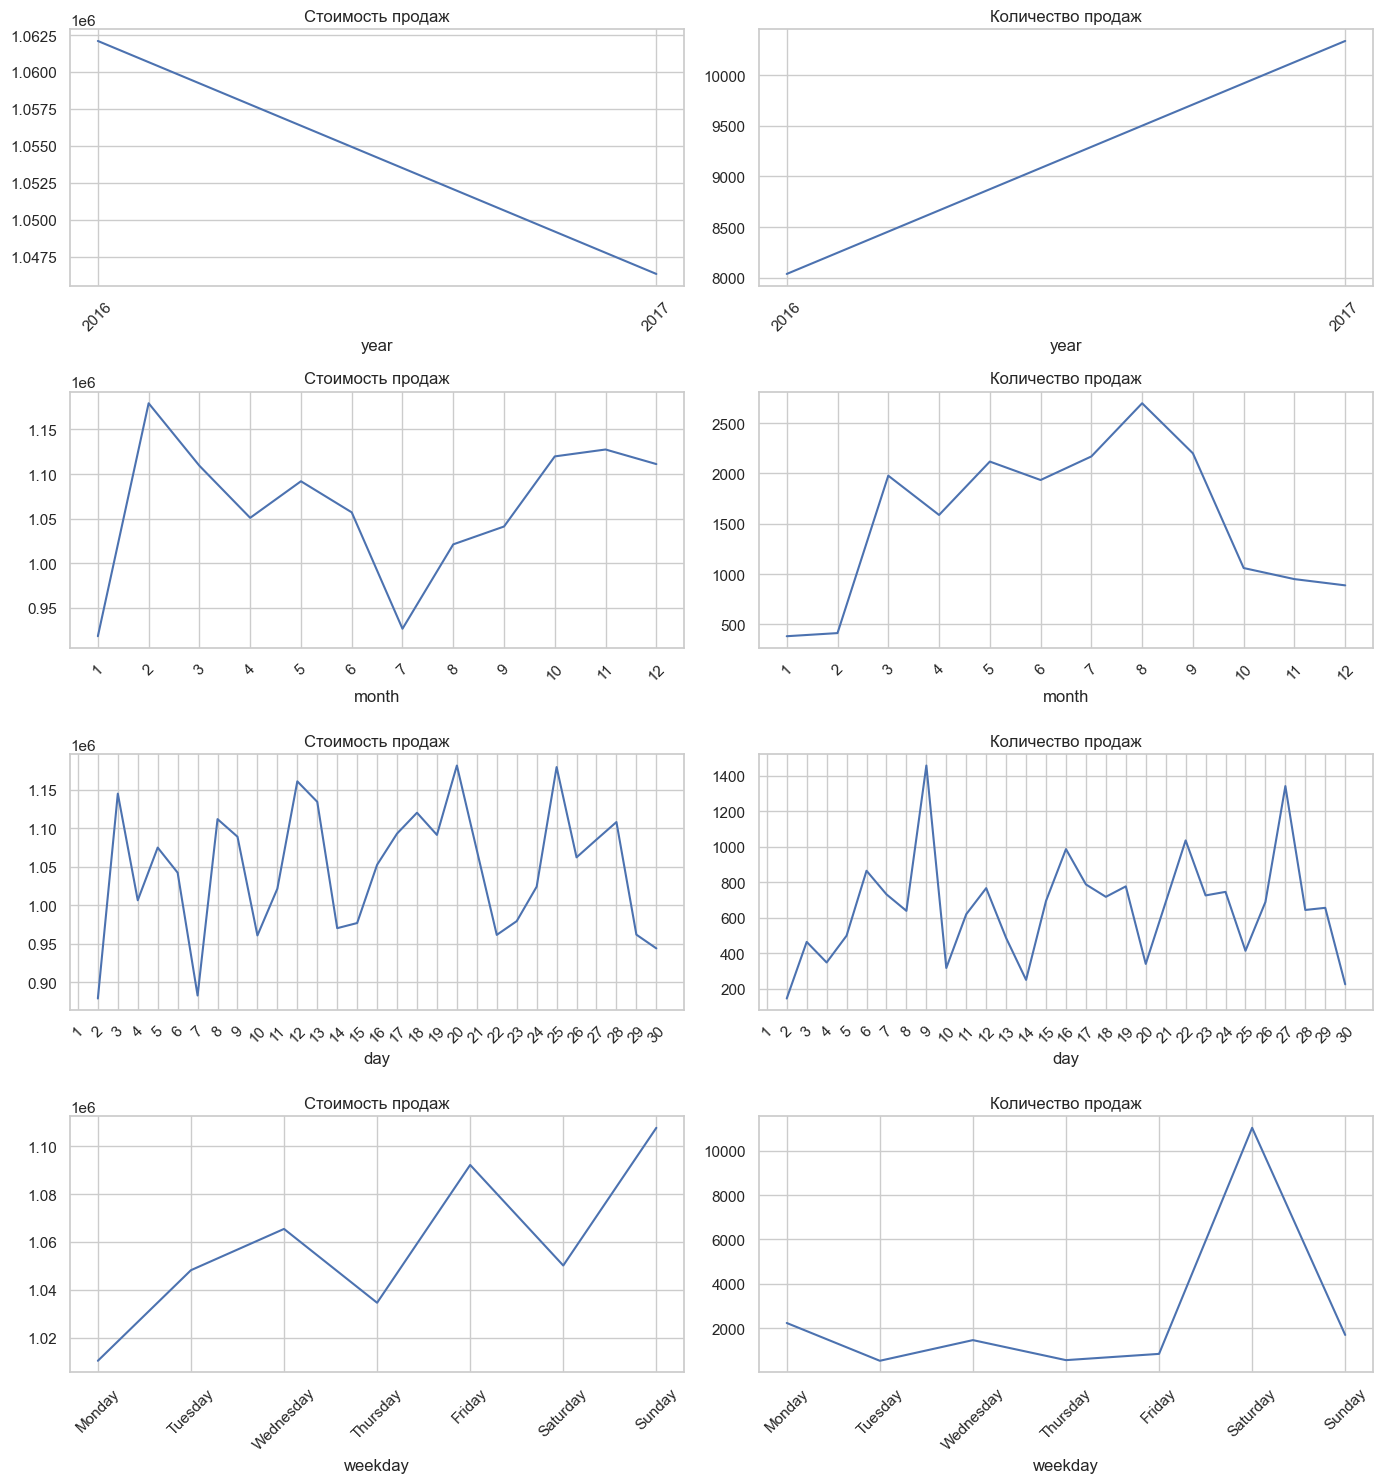

In [37]:
fig,ax=plt.subplots(4,2,figsize=(14,15))

df_time \
        .groupby('year')['Price'].mean() \
        .plot(ax=ax[0,0])
df_time \
        .groupby('year')['Price'].count() \
        .plot(ax=ax[0,1])
ax[0,0].set_title('Стоимость продаж')
ax[0,0].set_xticks([2016,2017])
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,1].set_title('Количество продаж')
ax[0,1].set_xticks([2016,2017])
ax[0,1].tick_params(axis='x', labelrotation=45)

df_time \
        .groupby('month')['Price'].mean() \
        .plot(ax=ax[1,0],)
df_time \
        .groupby('month')['Price'].count() \
        .plot(ax=ax[1,1])
ax[1,0].set_title('Стоимость продаж')
ax[1,0].set_xticks(list(range(1,13)))
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,1].set_title('Количество продаж')
ax[1,1].set_xticks(list(range(1,13)))
ax[1,1].tick_params(axis='x', labelrotation=45)

df_time \
        .groupby('day')['Price'].mean() \
        .plot(ax=ax[2,0])
df_time \
        .groupby('day')['Price'].count() \
        .plot(ax=ax[2,1])
ax[2,0].set_title('Стоимость продаж')
ax[2,0].set_xticks(list(range(1,31)))
ax[2,0].tick_params(axis='x', labelrotation=45)
ax[2,1].set_title('Количество продаж')
ax[2,1].set_xticks(list(range(1,31)))
ax[2,1].tick_params(axis='x', labelrotation=45)

df_time \
        .groupby('weekday')['Price'].mean() \
        .plot(ax=ax[3,0])
df_time \
        .groupby('weekday')['Price'].count() \
        .plot(ax=ax[3,1])
ax[3,0].set_xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax[3,0].set_title('Стоимость продаж')
ax[3,0].tick_params(axis='x', labelrotation=45)
ax[3,1].set_title('Количество продаж')
ax[3,1].set_xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax[3,1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

- В 2017 году продано объектов на меньшую сумму, но по количеству больше.
- Самый прибыльный месяц - Февраль. Самый неприбыльный - Июль.
- Наибольшее количество продаж происходит в Августе. В зимние месяцы количество продаж уменьшается.
- В 3,5,8,12,15,20,25,28 дни наблюдается рост дохода от продаж.
- В 3,5,9,12,16,22,27 дни наблюдается рост количества продаж.
- В 2,4,7,10,14,22,26,29,30 дни наблюдается спад дохода от продаж.
- В 2,4,8,10,14,20,25,28,30 дни наблюдается спад количества продаж.
- Заметно, что доход и количество продаж не везде совпадает по дням.
- В Среду, Пятницу, Воскресенье наблюдается рост дохода от продаж.
- В Понедельник, Четверг, Субботу наблюдется спад дохода от продаж.
- В Понедельник, Среду, Субботу наблюдается рост количества продаж.
- Во Вторник, Четверг, Воскресенье наблюдается спад количества продаж.

# 

 <a id="4.4"></a>

## <b>4.4 <span style='color:#422e13;font-family:cursive;'>|</span> Анализ временных рядов с удалением глобального тренда</b>

Год не включаем в анализ, т.к. их всего два.

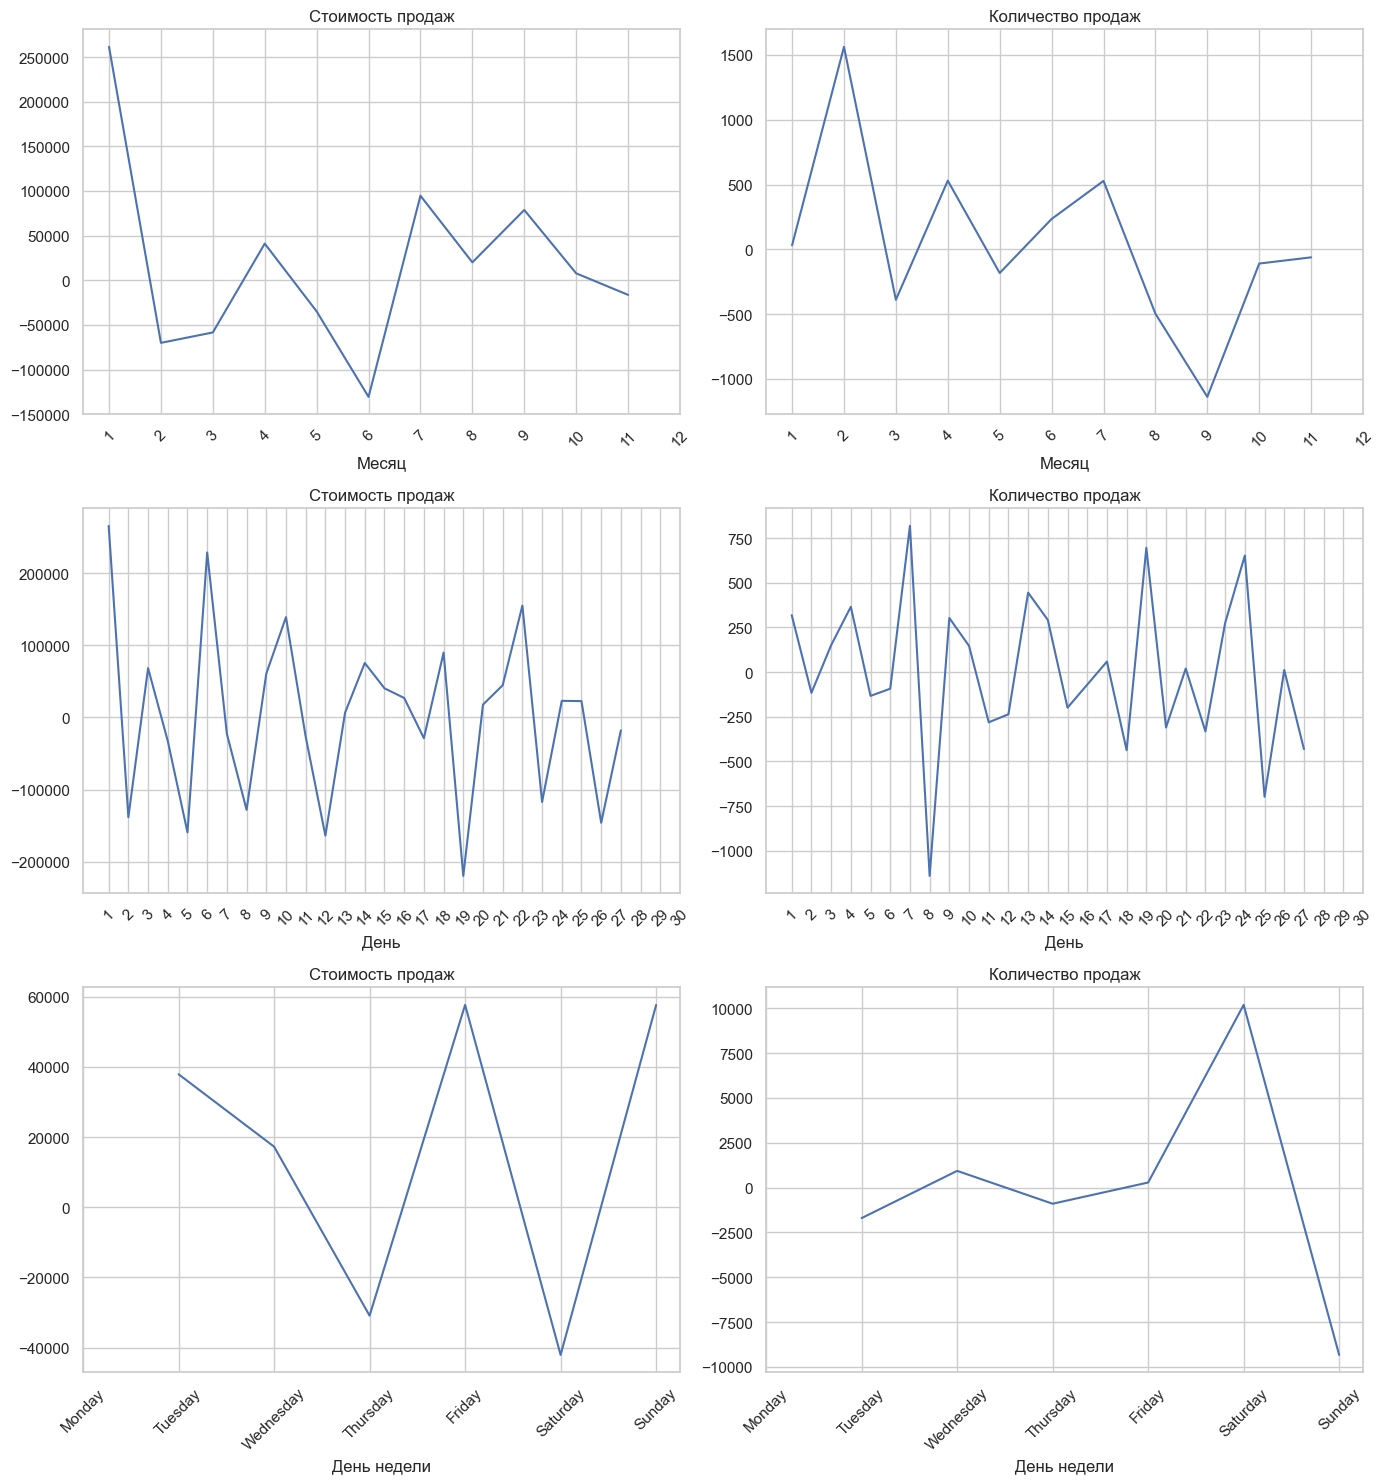

In [38]:
fig,ax=plt.subplots(3,2,figsize=(14,15))

group_month_mean=df_time \
                        .groupby('month')['Price'].mean() \
                        .reset_index()
group_month_count=df_time \
                        .groupby('month')['Price'].count() \
                        .reset_index()
group_month_mean['Price'] \
                        .diff() \
                        .plot(ax=ax[0,0])
group_month_count['Price'].diff() \
                        .plot(ax=ax[0,1])
ax[0,0].set_title('Стоимость продаж')
ax[0,0].set_xlabel('Месяц')
ax[0,0].set_xticks(list(range(1,13)))
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,1].set_title('Количество продаж')
ax[0,1].set_xticks(list(range(1,13)))
ax[0,1].tick_params(axis='x', labelrotation=45)
ax[0,1].set_xlabel('Месяц')

group_day_mean=df_time \
                        .groupby('day')['Price'].mean() \
                        .reset_index()
group_day_count=df_time \
                        .groupby('day')['Price'].count() \
                        .reset_index()
group_day_mean['Price'] \
                        .diff() \
                        .plot(ax=ax[1,0])
group_day_count['Price'] \
                        .diff() \
                        .plot(ax=ax[1,1])
ax[1,0].set_title('Стоимость продаж')
ax[1,0].set_xticks(list(range(1,31)))
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,0].set_xlabel('День')
ax[1,1].set_title('Количество продаж')
ax[1,1].set_xticks(list(range(1,31)))
ax[1,1].tick_params(axis='x', labelrotation=45)
ax[1,1].set_xlabel('День')

group_weekday_mean=df_time \
                        .groupby('weekday')['Price'].mean() \
                        .reset_index()
group_weekday_count=df_time \
                        .groupby('weekday')['Price'].count() \
                        .reset_index()
group_weekday_mean['Price'] \
                        .diff() \
                        .plot(ax=ax[2,0])
group_weekday_count['Price'] \
                        .diff() \
                        .plot(ax=ax[2,1])
ax[2,0].set_xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax[2,0].set_title('Стоимость продаж')
ax[2,0].tick_params(axis='x', labelrotation=45)
ax[2,0].set_xlabel('День недели')
ax[2,1].set_title('Количество продаж')
ax[2,1].set_xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax[2,1].tick_params(axis='x', labelrotation=45)
ax[2,1].set_xlabel('День недели')

plt.tight_layout()
plt.show()


- В Феврале,Июне, Августе, Октябре виден спад дохода от продаж.
- В Январе, Апреле, Июле, Сентябре виден рост дохода от продаж.
- В 1,3,6,10,14,18,22,24,27 дни месяца наблюдается рост суммы продаж 
- В 2,4,5,8,12,17,19,23,26 дни месяца наблюдается спад суммы продаж
- В 1,3,4,6,7,9,13,16,19,21,24,26 дни месяца наблюдается рост количества сделок
- В 2,5,8,10,11,14,18,20,22,25 дни наблюдается спад количества сделок
- В начале недели до четверга наблюдается спад суммы продаж, в сравнении с выходными. Затем в пятницу рост и в субботу резкий спад. В воскресенье также рост суммы продаж
- Количество сделок в начале недели больше, нежели в выходных, в Субботу идет резкий рост и затем спад.

# 

 <a id="5"></a>

# <b>5 <span style='color:#422e13;font-family:cursive;'>|</span> Machine Learning</b>

 <a id="5.1"></a>

### <b>5.1 <span style='color:#422e13;font-family:cursive;'>|</span> Обучающая и тестовая выборка</b>

In [39]:
X = train_full.drop(['Price'],axis=1)
y = train_full['Price']
cat_features = train_full.select_dtypes(include = ['object']).columns.tolist()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="5.2"></a>

### <b>5.2 <span style='color:#422e13;font-family:cursive;'>|</span> Grid Search</b>

In [58]:
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )

In [59]:
grid_model=CatBoostRegressor(
    iterations=100,
    eval_metric='MAPE',
    loss_function='MAE',
    verbose=300
)

In [60]:
grid = {
    'learning_rate': [0.03, 0.1, 0.3],
    'depth':[4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
grid_search_results = grid_model.grid_search(grid, train_data)

0:	learn: 0.9673228	test: 0.9679621	best: 0.9679621 (0)	total: 18.7ms	remaining: 1.85s
99:	learn: 0.1928020	test: 0.1917510	best: 0.1917510 (99)	total: 1.38s	remaining: 0us

bestTest = 0.1917509772
bestIteration = 99

0:	loss: 0.1917510	best: 0.1917510 (0)	total: 1.47s	remaining: 1m 4s
0:	learn: 0.8910758	test: 0.8932071	best: 0.8932071 (0)	total: 13.7ms	remaining: 1.36s
99:	learn: 0.1656556	test: 0.1647534	best: 0.1647534 (99)	total: 1.31s	remaining: 0us

bestTest = 0.1647534159
bestIteration = 99

1:	loss: 0.1647534	best: 0.1647534 (1)	total: 2.79s	remaining: 1m
0:	learn: 0.6734809	test: 0.6799576	best: 0.6799576 (0)	total: 13.7ms	remaining: 1.35s
99:	learn: 0.1537691	test: 0.1602947	best: 0.1602947 (99)	total: 1.29s	remaining: 0us

bestTest = 0.1602946793
bestIteration = 99

2:	loss: 0.1602947	best: 0.1602947 (2)	total: 4.09s	remaining: 57.3s
0:	learn: 0.9673228	test: 0.9679621	best: 0.9679621 (0)	total: 13.9ms	remaining: 1.38s
99:	learn: 0.1928020	test: 0.1917510	best: 0.1917510 (9

99:	learn: 0.1359751	test: 0.1525244	best: 0.1524412 (96)	total: 2.07s	remaining: 0us

bestTest = 0.1524411667
bestIteration = 96

29:	loss: 0.1524412	best: 0.1522161 (20)	total: 53s	remaining: 26.5s
0:	learn: 0.9672624	test: 0.9679006	best: 0.9679006 (0)	total: 27.5ms	remaining: 2.72s
99:	learn: 0.1736843	test: 0.1780886	best: 0.1780886 (99)	total: 3.29s	remaining: 0us

bestTest = 0.1780885848
bestIteration = 99

30:	loss: 0.1780886	best: 0.1522161 (20)	total: 56.3s	remaining: 25.4s
0:	learn: 0.8908745	test: 0.8930018	best: 0.8930018 (0)	total: 26.3ms	remaining: 2.6s
99:	learn: 0.1391655	test: 0.1546362	best: 0.1546362 (99)	total: 3.45s	remaining: 0us

bestTest = 0.154636167
bestIteration = 99

31:	loss: 0.1546362	best: 0.1522161 (20)	total: 59.8s	remaining: 24.3s
0:	learn: 0.6729308	test: 0.6794144	best: 0.6794144 (0)	total: 26.5ms	remaining: 2.62s
99:	learn: 0.1159231	test: 0.1565949	best: 0.1563889 (87)	total: 3.56s	remaining: 0us

bestTest = 0.1563889184
bestIteration = 87

32:	lo

In [61]:
print('Best parameters : {}\n'.format(grid_search_results['params']))
mag='Mean MAE value on validation set per each iteration:\n{}'
print(mag.format(np.round(grid_search_results['cv_results']['test-MAPE-mean'],4)))

Best parameters : {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.3}

Mean MAE value on validation set per each iteration:
[0.6769 0.4738 0.354  0.2895 0.2452 0.2216 0.2102 0.2    0.1957 0.1922
 0.1892 0.1867 0.1852 0.1834 0.1821 0.1804 0.1786 0.1777 0.1768 0.176
 0.175  0.174  0.1734 0.1729 0.1719 0.1712 0.1703 0.1702 0.1694 0.1689
 0.1683 0.1677 0.1671 0.1665 0.166  0.1654 0.165  0.1649 0.1645 0.1642
 0.1636 0.1635 0.1634 0.1631 0.1629 0.1626 0.1623 0.1622 0.1619 0.1618
 0.1614 0.1612 0.161  0.1609 0.1607 0.1608 0.1606 0.1605 0.1603 0.1602
 0.1601 0.1601 0.1599 0.1598 0.1597 0.1596 0.1593 0.1593 0.1592 0.1592
 0.1591 0.1592 0.1591 0.159  0.1589 0.1589 0.1587 0.1586 0.1586 0.1584
 0.1584 0.1583 0.1581 0.158  0.158  0.1579 0.1578 0.1578 0.1578 0.1578
 0.1576 0.1575 0.1574 0.1574 0.1573 0.1573 0.1573 0.1573 0.1572 0.1572]


In [62]:
grid_model.get_params()


{'iterations': 100,
 'loss_function': 'MAE',
 'verbose': 300,
 'eval_metric': 'MAPE',
 'depth': 6,
 'l2_leaf_reg': 3,
 'learning_rate': 0.3}

In [63]:
y_pred = grid_model.predict(X_test)

In [64]:
# функция для оценки модели 
def error(y_true,y_pred):
    print(mean_absolute_error(y_true,y_pred))
    print(mean_absolute_percentage_error(y_true,y_pred))

In [65]:
error(y_test,y_pred)

171865.85598348387
0.1531946011706501


Поменям скорость обучения модели и количество итераций при неизменных других параметрах

In [66]:
grid_model=CatBoostRegressor(
    iterations=1000,
    eval_metric='MAPE',
    loss_function='MAE',
    verbose=300
)

In [67]:
grid = {
    'learning_rate': [0.03, 0.1, 0.15, 0.2, 0.3],
    'depth':[6],
    'l2_leaf_reg': [3]
}
grid_search_results = grid_model.grid_search(grid, train_data)

0:	learn: 0.9661190	test: 0.9671516	best: 0.9671516 (0)	total: 41.4ms	remaining: 41.3s
300:	learn: 0.1553578	test: 0.1587147	best: 0.1587147 (300)	total: 11.8s	remaining: 27.3s
600:	learn: 0.1406338	test: 0.1501322	best: 0.1501322 (600)	total: 23.2s	remaining: 15.4s
900:	learn: 0.1328891	test: 0.1470443	best: 0.1470443 (900)	total: 34.4s	remaining: 3.78s
999:	learn: 0.1309562	test: 0.1465704	best: 0.1465588 (994)	total: 38.2s	remaining: 0us

bestTest = 0.1465588455
bestIteration = 994

0:	loss: 0.1465588	best: 0.1465588 (0)	total: 38.3s	remaining: 2m 33s
0:	learn: 0.8870633	test: 0.8905052	best: 0.8905052 (0)	total: 39.8ms	remaining: 39.7s
300:	learn: 0.1319968	test: 0.1474640	best: 0.1474368 (299)	total: 11.3s	remaining: 26.1s
600:	learn: 0.1187472	test: 0.1446882	best: 0.1446834 (598)	total: 22.4s	remaining: 14.9s
900:	learn: 0.1111514	test: 0.1442454	best: 0.1442085 (883)	total: 33.5s	remaining: 3.69s
999:	learn: 0.1091967	test: 0.1441092	best: 0.1440901 (998)	total: 37.2s	remaining

In [68]:
grid_model.get_params()


{'iterations': 1000,
 'loss_function': 'MAE',
 'verbose': 300,
 'eval_metric': 'MAPE',
 'depth': 6,
 'l2_leaf_reg': 3,
 'learning_rate': 0.1}

In [69]:
y_pred = grid_model.predict(X_test)

In [70]:
error(y_test,y_pred)

161193.08560026364
0.14407824831149055


In [71]:
y_pred_train = grid_model.predict(X_train)

In [72]:
error(y_train,y_pred_train)

137370.27632152257
0.11980544939248458


- Для оценки используем метрику MAPE. Данная метрика показывает насколько в среднем прогноз отличается от имеющихся данных в процентах 
- С помощью подбора параметров по Grid Search наша модель ошибется на 14.4%.
- На тренировочных данных модель ошибается на 11.9%, разница небольшая. Это говорит о том, что модель не переобучается

# 

<a id="5.3"></a>

### <b>5.3 <span style='color:#422e13;font-family:cursive;'>|</span> Randomized search</b>

In [73]:
randomized_model=CatBoostRegressor(
    iterations=100,
    eval_metric='MAPE',
    loss_function="MAE",
    random_seed=42,
    verbose=200
)

In [74]:
grid = {
    'learning_rate': [0.03, 0.1, 0.3],
    'depth':[4, 6, 8],
    'l2_leaf_reg':[3]
}

randomized_search_results = randomized_model.randomized_search(grid, train_data)

0:	learn: 0.9673778	test: 0.9679972	best: 0.9679972 (0)	total: 15.4ms	remaining: 1.53s
99:	learn: 0.1937599	test: 0.1928717	best: 0.1928717 (99)	total: 1.29s	remaining: 0us

bestTest = 0.1928716895
bestIteration = 99

0:	loss: 0.1928717	best: 0.1928717 (0)	total: 1.39s	remaining: 11.1s
0:	learn: 0.8912595	test: 0.8933240	best: 0.8933240 (0)	total: 15.4ms	remaining: 1.52s
99:	learn: 0.1676725	test: 0.1686709	best: 0.1686709 (99)	total: 1.3s	remaining: 0us

bestTest = 0.1686709003
bestIteration = 99

1:	loss: 0.1686709	best: 0.1686709 (1)	total: 2.69s	remaining: 9.43s
0:	learn: 0.6742908	test: 0.6800530	best: 0.6800530 (0)	total: 14.8ms	remaining: 1.46s
99:	learn: 0.1522349	test: 0.1580841	best: 0.1580841 (99)	total: 1.26s	remaining: 0us

bestTest = 0.1580840984
bestIteration = 99

2:	loss: 0.1580841	best: 0.1580841 (2)	total: 3.96s	remaining: 7.92s
0:	learn: 0.9687282	test: 0.9694235	best: 0.9694235 (0)	total: 21.9ms	remaining: 2.17s
99:	learn: 0.1837519	test: 0.1845892	best: 0.1845892 

In [75]:
print('Best parameters : {}\n'.format(randomized_search_results['params']))
mag='Mean MAPE value on validation set per each iteration:\n{}'
print(mag.format(np.round(randomized_search_results['cv_results']['test-MAPE-mean'],4)))

Best parameters : {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.3}

Mean MAPE value on validation set per each iteration:
[0.6712 0.4586 0.3675 0.2934 0.2496 0.2199 0.2034 0.195  0.191  0.1867
 0.1836 0.1817 0.1795 0.1777 0.1763 0.1752 0.1746 0.1742 0.1737 0.1727
 0.172  0.1712 0.1703 0.17   0.1695 0.169  0.1688 0.1684 0.1681 0.1674
 0.1668 0.1663 0.1658 0.1655 0.1652 0.165  0.1648 0.1644 0.164  0.1637
 0.1635 0.1633 0.1627 0.1623 0.1619 0.1617 0.1616 0.1615 0.1614 0.1612
 0.1611 0.161  0.1609 0.1608 0.1607 0.1604 0.1601 0.1601 0.1599 0.1597
 0.1594 0.1594 0.1592 0.159  0.159  0.1589 0.1588 0.1587 0.1586 0.1584
 0.1584 0.1584 0.1584 0.1583 0.1582 0.1581 0.1581 0.158  0.1578 0.1577
 0.1576 0.1576 0.1575 0.1574 0.1573 0.1574 0.1575 0.1574 0.1574 0.1572
 0.1572 0.157  0.1571 0.1571 0.157  0.157  0.157  0.157  0.157  0.1571]


In [76]:
randomized_model.get_params()

{'iterations': 100,
 'loss_function': 'MAE',
 'random_seed': 42,
 'verbose': 200,
 'eval_metric': 'MAPE',
 'depth': 6,
 'l2_leaf_reg': 3,
 'learning_rate': 0.3}

In [77]:
y_pred = randomized_model.predict(X_test)
y_pred_train = randomized_model.predict(X_train)

In [78]:
error(y_test,y_pred)

171140.12634560786
0.15275622655883273


In [79]:
error(y_train,y_pred_train)

153899.125579712
0.13728889812944473


Изменим количество итераций и скорость обучения при неизменных других параметрах 

In [80]:
randomized_model=CatBoostRegressor(
    iterations=1000,
    eval_metric='MAPE',
    loss_function="MAE",
    random_seed=42,
    verbose=300
)

In [81]:
grid = {
    'learning_rate': [0.03, 0.1, 0.15, 0.2, 0.3],
    'depth':[4],
    'l2_leaf_reg':[3]
}

randomized_search_results = randomized_model.randomized_search(grid, train_data)

0:	learn: 0.9682515	test: 0.9687860	best: 0.9687860 (0)	total: 24ms	remaining: 24s
300:	learn: 0.1664010	test: 0.1667119	best: 0.1667119 (300)	total: 6.35s	remaining: 14.8s
600:	learn: 0.1538877	test: 0.1571568	best: 0.1571568 (600)	total: 12.9s	remaining: 8.57s
900:	learn: 0.1476493	test: 0.1528130	best: 0.1528130 (900)	total: 21.1s	remaining: 2.32s
999:	learn: 0.1462275	test: 0.1520515	best: 0.1520432 (998)	total: 23.4s	remaining: 0us

bestTest = 0.1520432006
bestIteration = 998

0:	loss: 0.1520432	best: 0.1520432 (0)	total: 23.6s	remaining: 1m 34s
0:	learn: 0.8941717	test: 0.8959532	best: 0.8959532 (0)	total: 25ms	remaining: 25s
300:	learn: 0.1467509	test: 0.1516883	best: 0.1516720 (298)	total: 6.88s	remaining: 16s
600:	learn: 0.1370235	test: 0.1476722	best: 0.1476701 (599)	total: 13.5s	remaining: 8.94s
900:	learn: 0.1315683	test: 0.1464616	best: 0.1464600 (899)	total: 20s	remaining: 2.2s
999:	learn: 0.1300727	test: 0.1463445	best: 0.1463397 (985)	total: 22.2s	remaining: 0us

bestTe

In [82]:
randomized_model.get_params()

{'iterations': 1000,
 'loss_function': 'MAE',
 'random_seed': 42,
 'verbose': 300,
 'eval_metric': 'MAPE',
 'depth': 4,
 'l2_leaf_reg': 3,
 'learning_rate': 0.1}

In [83]:
y_pred = randomized_model.predict(X_test)
y_pred_train = randomized_model.predict(X_train)

In [84]:
error(y_test,y_pred)

166082.5841213686
0.14811678119681934


In [85]:
error(y_train,y_pred_train)

148805.47951474128
0.12979092204757742


- Результаты хуже на 0.4% чем при GridSearch. Модель ошибается на 14.8%.
- На тренировочных данных модель ошибется на 12.9%. Можно сказать что модель обучается нормально, нет переобучения

# 

<a id="5.4"></a>

### <b>5.4 <span style='color:#422e13;font-family:cursive;'>|</span> Кросс-валидация</b>

In [86]:
grid_model.get_params()

{'iterations': 1000,
 'loss_function': 'MAE',
 'verbose': 300,
 'eval_metric': 'MAPE',
 'depth': 6,
 'l2_leaf_reg': 3,
 'learning_rate': 0.1}

In [87]:
params = {'iterations': 1000,
          'loss_function': 'MAE',
          'eval_metric': 'MAPE',
          'depth': 6,
          'l2_leaf_reg': 3,
          'learning_rate': 0.1}

In [88]:
cv_data = cv(
    params = params,
    pool = train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    early_stopping_rounds=200
)

Training on fold [0/5]

bestTest = 0.1469313579
bestIteration = 890

Training on fold [1/5]

bestTest = 0.1452636247
bestIteration = 749

Training on fold [2/5]

bestTest = 0.1435932191
bestIteration = 999

Training on fold [3/5]

bestTest = 0.1470063879
bestIteration = 926

Training on fold [4/5]

bestTest = 0.1443988619
bestIteration = 998



In [89]:
n_iters = cv_data[cv_data['test-MAPE-mean'] == cv_data['test-MAPE-mean'].min()]['iterations'].values[0]

In [90]:
n_iters

998

- Результаты кросс-валидации говорят о том что модель обучается практичски одинаково на разных наборам данных, в данном случае мы рзделили данные на 5 частей.
- Лучшая итерация модели - 998

# 

<a id="5.5"></a>

### <b>5.5 <span style='color:#422e13;font-family:cursive;'>|</span> Обучение модели на всех данных</b>

In [91]:
params = {'iterations':n_iters,
          'cat_features': cat_features,
          'eval_metric': 'MAPE',
          'loss_function': 'MAE',
          'learning_rate': 0.1,
          'depth': 6,
          'l2_leaf_reg': 3,
          'random_seed': 42,
          'verbose':100}

In [92]:
final_model = CatBoostRegressor(**params)

In [93]:
train_full_X = train_full.drop('Price',axis=1)
train_full_y = train_full['Price']

In [94]:
final_model.fit(train_full_X,train_full_y)

0:	learn: 0.3974053	total: 45.2ms	remaining: 45.1s
100:	learn: 0.1546740	total: 4.59s	remaining: 40.7s
200:	learn: 0.1414310	total: 9.12s	remaining: 36.1s
300:	learn: 0.1348891	total: 13.6s	remaining: 31.6s
400:	learn: 0.1303034	total: 18.5s	remaining: 27.5s
500:	learn: 0.1265706	total: 23.1s	remaining: 22.9s
600:	learn: 0.1237272	total: 27.8s	remaining: 18.4s
700:	learn: 0.1212568	total: 32.4s	remaining: 13.7s
800:	learn: 0.1190323	total: 37.1s	remaining: 9.12s
900:	learn: 0.1172482	total: 41.6s	remaining: 4.48s
997:	learn: 0.1155647	total: 46.2s	remaining: 0us


# 

<a id="5.6"></a>

### <b>5.6 <span style='color:#422e13;font-family:cursive;'>|</span> Feature importance</b>

In [95]:
importance = final_model.get_feature_importance(prettified=True)

<Axes: xlabel='Feature Id'>

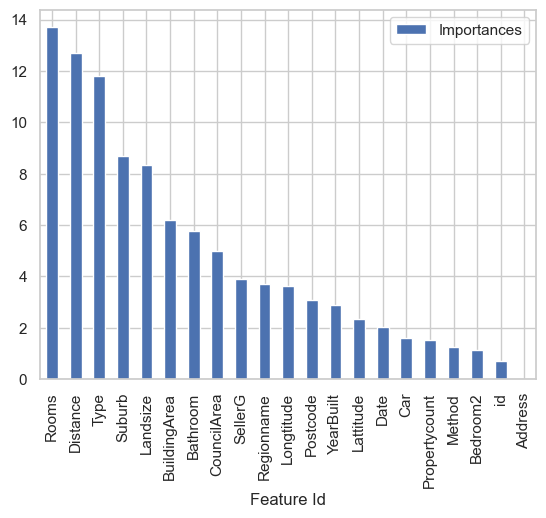

In [96]:
importance.set_index('Feature Id').plot(kind='bar')

Наиболее важными фичами для предсказания модель выбрала количество комнат по дистанции,тип объекта, размер земли и т.д. 

# 

<a id="5.7"></a>

### <b>5.7 <span style='color:#422e13;font-family:cursive;'>|</span> Сохранение модели</b>

In [97]:
dump(final_model, 'house_price_model.joblib') 

['house_price_model.joblib']

# 

<a id="5.8"></a>

### <b>5.8 <span style='color:#422e13;font-family:cursive;'>|</span> Предсказание цены на новых данных</b>

In [98]:
df_test = pd.read_csv('test.csv')

In [99]:
df_test.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,513/6 Acacia Pl,3,u,S,Dingle,7/10/2017,3.00,3067.00,NaN,...,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.00,30130
1,Abbotsford,60 Charles St,3,h,S,Jellis,7/10/2017,3.00,3067.00,3.00,...,NaN,192.00,109.00,1900.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,18311
2,Abbotsford,38 Studley St,3,h,S,Nelson,7/10/2017,3.00,3067.00,3.00,...,1.00,159.00,93.00,1890.00,Yarra City Council,-37.80,144.99,Northern Metropolitan,4019.00,18934
3,Airport West,18 Glenys Av,3,h,S,Raine,7/10/2017,10.40,3042.00,3.00,...,5.00,536.00,108.00,1980.00,Moonee Valley City Council,-37.72,144.88,Western Metropolitan,3464.00,1824
4,Airport West,35 Thomas St,3,h,S,Nelson,7/10/2017,10.40,3042.00,3.00,...,1.00,NaN,130.00,2009.00,Moonee Valley City Council,-37.72,144.88,Western Metropolitan,3464.00,31339


В новых данных нет цены объектов. Необъодимо ее предсказать с помощью сделанной модели.

# 

In [100]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8818 non-null   object 
 1   Address        8818 non-null   object 
 2   Rooms          8818 non-null   int64  
 3   Type           8818 non-null   object 
 4   Method         8818 non-null   object 
 5   SellerG        8818 non-null   object 
 6   Date           8818 non-null   object 
 7   Distance       8817 non-null   float64
 8   Postcode       8817 non-null   float64
 9   Bedroom2       5858 non-null   float64
 10  Bathroom       5854 non-null   float64
 11  Car            5582 non-null   float64
 12  Landsize       4365 non-null   float64
 13  BuildingArea   2882 non-null   float64
 14  YearBuilt      3112 non-null   float64
 15  CouncilArea    8816 non-null   object 
 16  Lattitude      5908 non-null   float64
 17  Longtitude     5908 non-null   float64
 18  Regionna

Заменим пропущенные значения в новом файле с помощью сделанной функции replace_nan

# 

In [101]:
for col in df_test.columns[df_test.isnull().any()].tolist():
    replace_nan(df_test,col)

In [102]:
df_test.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
id               0
dtype: int64

In [103]:
cat_features = list(df.select_dtypes(include = ['object']).columns)

In [104]:
test_data_pred = Pool(data=df_test,
                  cat_features=cat_features
                 )

In [105]:
df_test['Price'] = final_model.predict(test_data_pred)

In [106]:
df_test['id'] = df_test['id'].astype('int32')

In [107]:
df_test[['id', 'Price']].to_csv('predict.csv', index=False)

In [108]:
df_test[['id','Price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8818 non-null   int32  
 1   Price   8818 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 103.5 KB


# 

<a id="6"></a>

## <b>6 <span style='color:#422e13;font-family:cursive;'>|</span> Выводы</b>

У нас есть информация о продаже недвижимости в Мельбурне, штат Виктория, за период с 28 января 2016 года по 30 сентября 2017 года. В начале 2016 года продажи были единичными, а в марте 2016 года и в январе 2017 года они вообще не происходили. В 2017 году количество продаж недвижимости было больше, чем в 2016 году.

Большинство сделок было совершено в столице, а продажи из других населенных пунктов штата Виктория составляют небольшую долю. Наибольшее количество сделок и высокие цены наблюдаются в Южном столичном регионе. Сделки с таунхаусами и квартирами/дуплексами практически не встречаются за пределами столицы.

В Австралии недвижимость продается на аукционах, которые проходят в среднем от 2 до 5 раз в месяц, чаще всего в субботу. Существует несколько видов сделок, но в нашем наборе данных есть только 5 из них: продажа до аукциона, продажа на аукционе, продажа после аукциона, "передача" и предложение поставщика. Метод продажи определяется в момент продажи, поэтому его использование при построении модели нецелесообразно.

Существуют три типа недвижимости: 'house', 'townhouse' и 'unit'. 'House' - это самый дорогой тип жилья, который начал строиться с 1830 года и чаще всего находится дальше от центра. Объекты этого типа имеют большую площадь и прилегающую территорию, в среднем они имеют три комнаты и две ванные комнаты.

'Townhouse' - это более дешевый вариант жилья, чем 'house', но дороже, чем 'unit'. Они также находятся дальше от центра, имеют немного меньшую площадь и прилегающую территорию, в среднем они имеют три комнаты и две ванные комнаты.

'Unit' - это самый дешевый тип недвижимости. Хотя они находятся ближе к центру, они имеют самую маленькую площадь объекта, в основном без прилегающей территории (за исключением домов на двух хозяев, у которых она есть). В среднем они имеют две комнаты и одну ванную комнату.